<h1 style="color:blue; font-size:36px;">Projet Machine Learning 4A</h1>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
data=pd.read_csv('global-data-on-sustainable-energy.csv')
data.shape
Value_co2_emissions_kt_by_country=data['Value_co2_emissions_kt_by_country']

FileNotFoundError: [Errno 2] No such file or directory: 'global-data-on-sustainable-energy .csv'

### <span style="color:blue">**I. Nettoyage des données** </span>

#### <span style="color:blue">**I.1 Suppression des NAN** </span>

In [ ]:
data.describe()

#### Grace à la statistique "count", nous constatons que les variables n'ont pas toutes le meme nombre d'observations indinquant ainsi la présence de données manquantes

In [ ]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

#### Nous allons retirer les variables Renewables, Financial flows to developing countries et Renewable-electricity-generating-capacity-per-capita en raison de leur taux de données manquantes, situé entre 25 et 60 %. Ensuite, nous éliminerons tous les individus ayant des valeurs non disponibles (NaN) pour les variables restantes. il nous reste ainsi 2868 individus avec 18 variables

In [ ]:
data.drop(['Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)'],axis=1,inplace=True)
data.dropna(axis=0,inplace=True)
print('new shape=',data.shape)

#### <span style="color:blue">**I.2 Conversion des variables 'Year' et 'Entity'* </span>

In [ ]:
data['Year'] = data['Year'].astype('category')
data.rename(columns={data.columns[14]: 'Density'}, inplace=True) #renommer la colonne Density pour faciliter l'accés à la variable
data['Density']= pd.to_numeric(data['Density'], errors='coerce')

data.dtypes

### <span style="color:blue">**II. Analyse unidimentionnelle** </span>

#### <span style="color:blue">**II.1 Variables qualitatives'* </span>

In [ ]:
data['Year'].value_counts().plot.bar()
plt.figure(figsize=(15,6))

data['Entity'].value_counts().sort_values(ascending=True).plot.bar()
plt.tick_params(axis='x', rotation=90)

#### Nous observons des disparités dans le nombre d'observations pour chaque année. Les années les plus anciennes présentent moins d'observations que les plus récentes, ce qui peut indiquer une amélioration dans la collecte des données au fil du temps. De plus, il est important de noter que nous n'avons pas le même nombre d'observations pour chaque pays. Certains pays, comme le South Sudan, ont significativement moins d'observations par rapport aux autres, ce qui pourrait refléter des lacunes dans la disponibilité des données ou des déficultés dans la collecte d'informations dans ces régions

#### <span style="color:blue">**II.2 Variables quantitatives'* </span>

In [ ]:
data1=data.iloc[:,2:] #On extrait que les variables quantitatives

In [ ]:
sns.boxplot(data1)
plt.xticks(rotation=90)

#### Nous notons que nos variables présentent non seulement  unités de mesure variées, mais aussi des échelles différentes. Certaines variables ont une importance relative plus élevée que d'autres. Afin d'homogénéiser nos données on va les centrer et les reduire

In [ ]:
mean=data1.mean()
std=data1.std()
data1=(data1-mean)/std
sns.boxplot(data1)
plt.xticks(rotation=90)

In [3]:

def percent_outliers(data):
    percent_outliers_list = []
    for i in range(len(data.columns)): 
            q1 = np.percentile(data.iloc[:, i], 25)
            q3 = np.percentile(data.iloc[:, i], 75)
            iqr = q3 - q1
            bornes_inf = q1 - 1.5 * iqr
            bornes_sup = q3 + 1.5 * iqr
            outliers = data.iloc[:, i][(data.iloc[:, i] < bornes_inf) | (data.iloc[:, i] > bornes_sup)]
            percent_outliers = 100 * len(outliers) / len(data.iloc[:, i])
            percent_outliers_list.append((data.columns[i], percent_outliers))
    return percent_outliers_list

pourcentages_outliers = percent_outliers(data1)

# Tri de la liste par ordre croissant en fonction du pourcentage d'outliers
percent_outliers_tries = sorted(pourcentages_outliers, key=lambda x: x[1],reverse=True)


# Séparation des colonnes et des pourcentages
colonnes = [colonne for colonne, _ in pourcentages_outliers_tries]
pourcentages = [pourcentage for _, pourcentage in pourcentages_outliers_tries]

# Tracé du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(colonnes, pourcentages, color='skyblue')
plt.xlabel("Pourcentage d'outliers")
plt.title("Pourcentage d'outliers par variables")
plt.xticks(rotation=90)
plt.show()
        
    






NameError: name 'data1' is not defined

On remarque après analyse des boxplot qu’il y'a beacoup d'outliers au niveau des variables 'Electricity from fossil fuels', 'Electricity from nuclear' et 'Electricity from renewables'. Il contiennent plus 15% de valeurs aberrantes. Il est plausible que dans certains pays, ces sources d'énergie soient très abondantes et largement utilisées, ce qui peut entraîner des fluctuations extrêmes dans les données.

NameError: name 'data1' is not defined

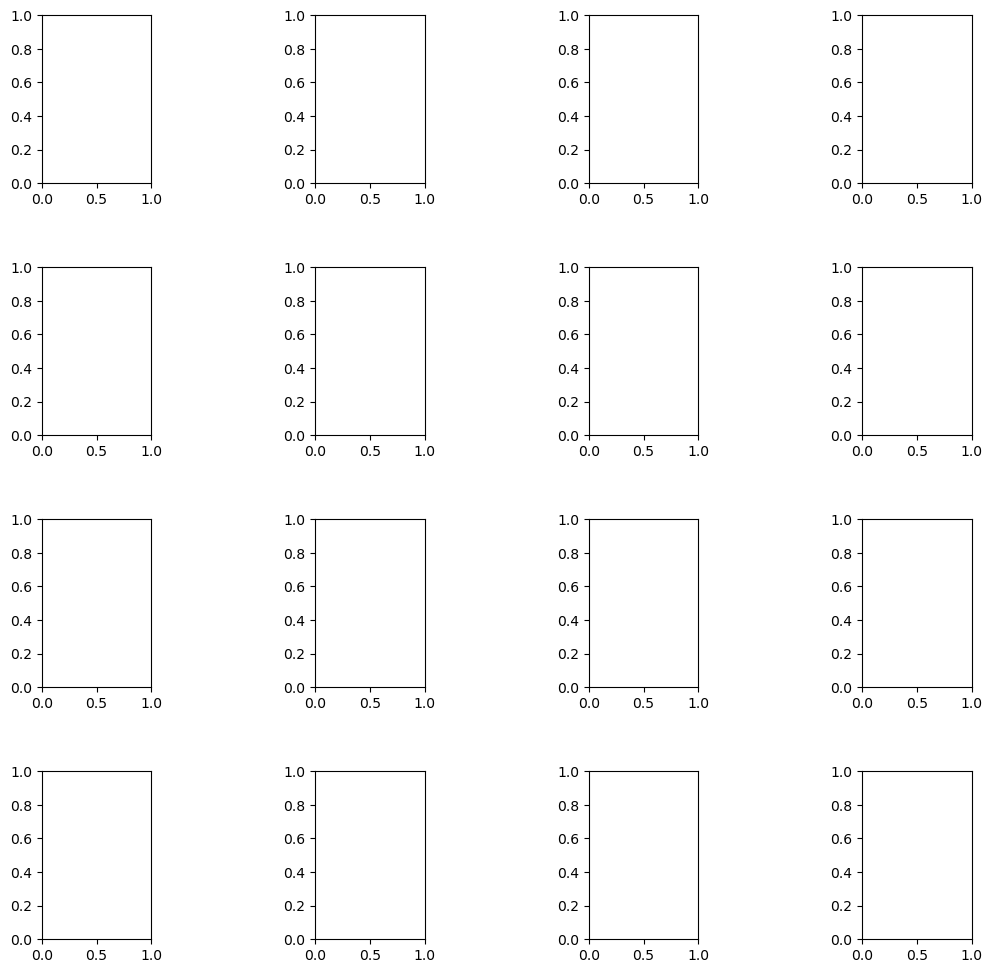

In [4]:
fig,ax=plt.subplots(4,4,figsize=(12, 12))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
for i in range(4):
    for j in range(4):
        sns.histplot(data1.iloc[:, 4*i+j], kde=True, ax=ax[i, j])

plt.show()


### <span style="color:blue">**II. Analyse multiimentionnelle** </span>

In [ ]:
sns.heatmap(data1.corr(),cmap='plasma')


In [ ]:
correlation_matrix = np.corrcoef(data1, rowvar=False)
9//2+1

In [ ]:
from scipy.stats import linregress
res=[]
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        correlation_coef = correlation_matrix[i, j]
        if correlation_coef > 0.8:
            res.append([data1.columns[i],data1.columns[j]])
print(res)

k=0
fig,ax=plt.subplots(2,len(res)//2,figsize=(12,12))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
plt
for i in range(2):
    for j in range(len(res)//2):
        # Tracer le nuage de points
        ax[i,j].scatter(data1.loc[:, res[k][0]], data1.loc[:, res[k][1]])
    
        # Calcul de la droite de régression linéaire
        slope, intercept, _, _, _ = linregress(data1.loc[:, res[k][0]], data1.loc[:, res[k][1]])
        regression_line = slope * data1.loc[:, res[k][0]] + intercept
    
        # Tracer la droite de régression linéaire
        ax[i,j].plot(slope * data1.loc[:, res[k][0]], regression_line, color='red')
        # Étiquettes et légendes
        ax[i,j].set_xlabel(res[k][0])
        ax[i,j].set_ylabel(res[k][1])
        k+=1
        
        # Afficher le graphique
plt.show()

In [ ]:
res=[]
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        correlation_coef = correlation_matrix[i, j]
        if correlation_coef > 0.8:
            res.append([data1.columns[i],data1.columns[j]])
print(res)
len(res)

In [ ]:
fig,ax=plt.subplots(4,4,figsize=(20,12))
plt.subplots_adjust(hspace=1, wspace=1)
for i in range(4):
    for j in range(4):
        sns.boxplot(x=data.iloc[:,1],y=data1.iloc[:,4*i+j],data=data,ax=ax[i, j])
        ax[i, j].set_xticks(ax[i, j].get_xticks())
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=45)
plt.show()

NameError: name 'data' is not defined

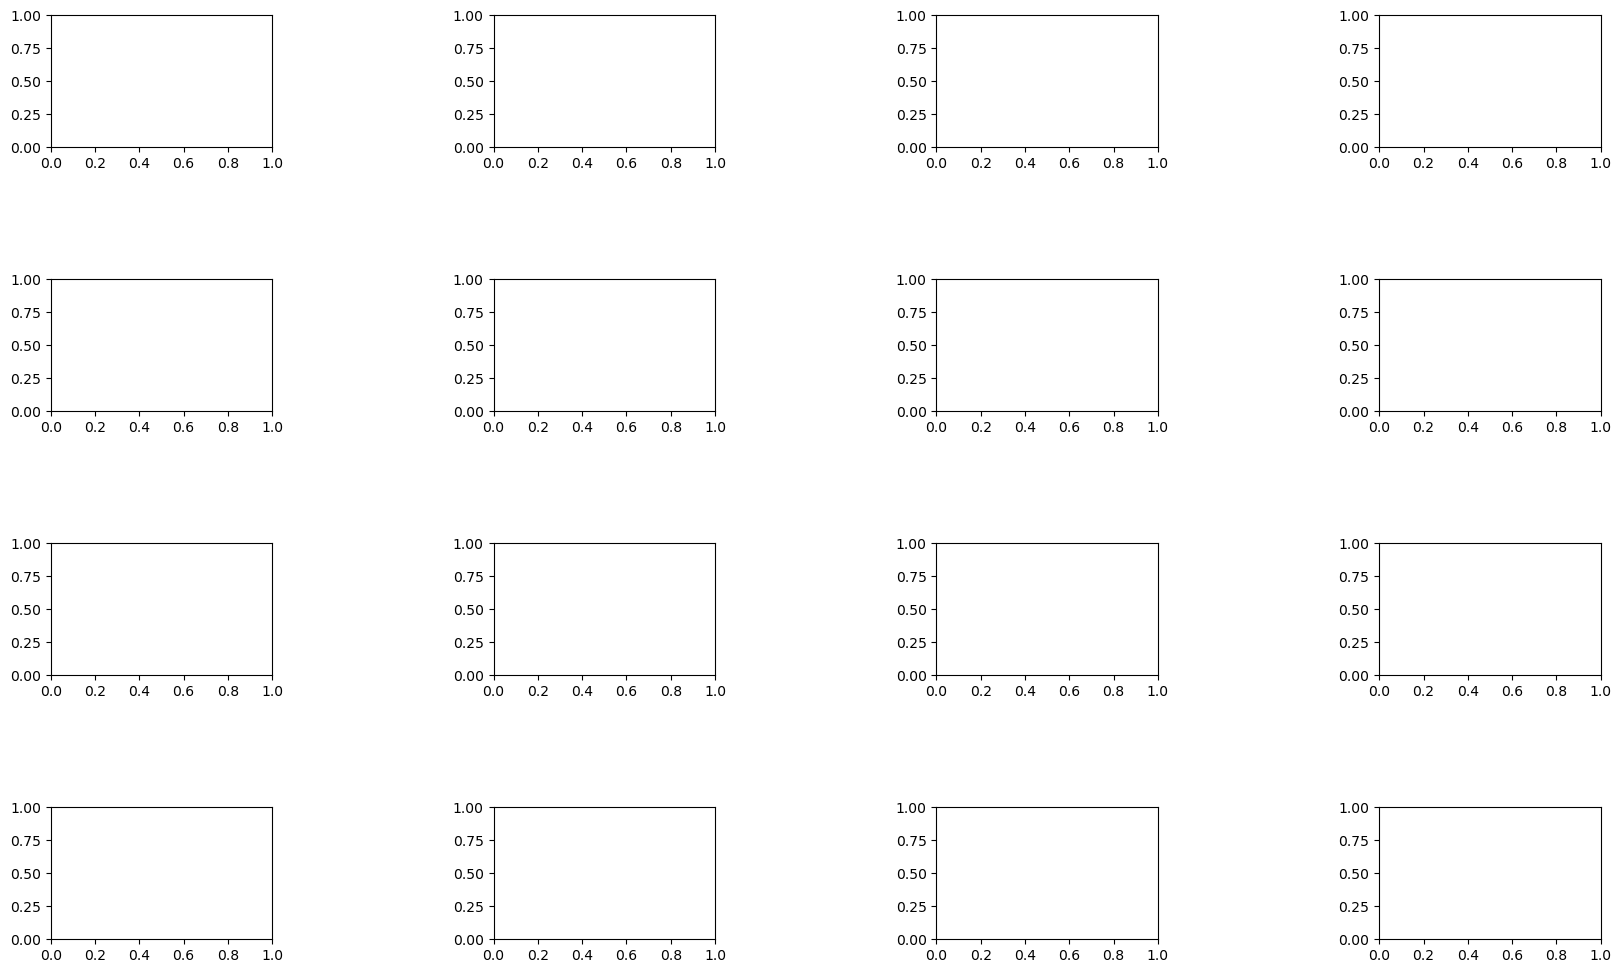

In [5]:
fig,ax=plt.subplots(4,4,figsize=(20,12))
plt.subplots_adjust(hspace=1, wspace=1)
for i in range(4):
    for j in range(4):
        sns.boxplot(x=data.iloc[:,0],y=data1.iloc[:,4*i+j],data=data,ax=ax[i, j])
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=90)
plt.show()

In [ ]:
data.head()

In [ ]:
mean=data1.mean()
std=data1.std()
-----------------
data1=(data1-mean)/std

data1.head()


In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x=data['Entity'],y=data['Value_co2_emissions_kt_by_country'],data=data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#data['Value_co2_emissions_kt_by_country'].groupby(['Entity'])
data['Value_co2_emissions_kt_by_country'].groupby(data['Entity']).sum().sort_values(ascending=False)

Les 5 pays les plus émetteurs de CO2 sont: La chine, les etats unis,l'inde, le japon et L'allmagne